In [2]:
import torch
import matplotlib.pyplot as plt

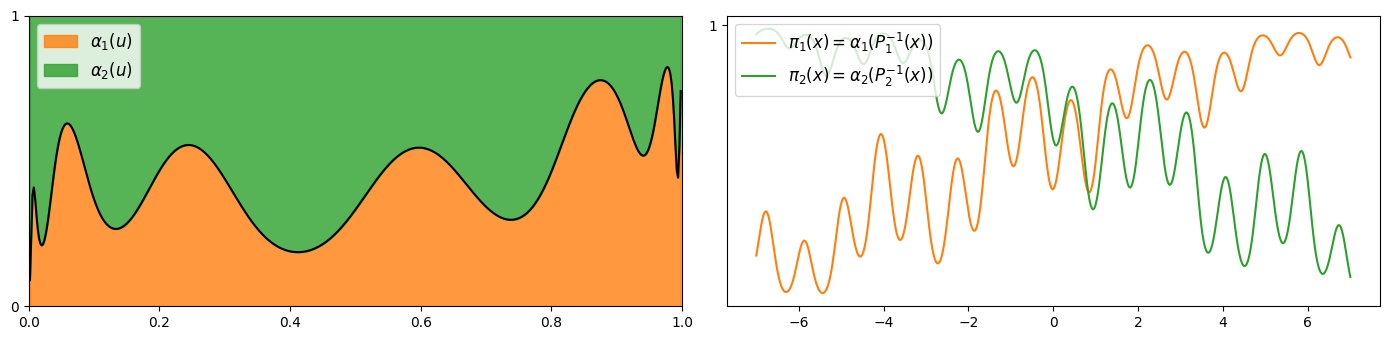

In [3]:
sin = lambda z : z/3 + 0.75*torch.sin(z*7)+ torch.sin(z)**2 - .2
w  = lambda z: torch.softmax(torch.cat([sin(z).unsqueeze(-1), 0.5*torch.ones_like(sin(z)).unsqueeze(-1)], dim = -1), dim = -1)
pi_1_x = lambda x: w(x+2.5)[:,0]
pi_2_x = lambda x: w(x-2.5)[:,1]
tt = torch.linspace(-7,7,500)
fig = plt.figure(figsize = (14,5))
ax = fig.add_subplot(122)
ax.set_yticks([0,1],[0,1])
ax.plot(tt,pi_1_x(tt), color = 'C1', label = r'$\pi_1(x) = \alpha_1(P_1^{-1}(x))$')
ax.plot(tt,pi_2_x(tt), color = 'C2', label = r'$\pi_2(x) = \alpha_2(P_2^{-1}(x))$')
ax.legend(fontsize = 12, loc = 'upper left')

base = torch.distributions.Normal(0,1)
ax = fig.add_subplot(121)
ax.set_yticks([0,1],[0,1])
ax.set_xlim(0,1)
ax.set_ylim(0,1)
alpha = lambda u: w(base.icdf(u))
tt_alpha =torch.linspace(0,1,500)
ax.plot(tt_alpha, alpha(tt_alpha)[:,0], color = 'black')
ax.fill_between(tt_alpha, torch.zeros_like(tt_alpha),alpha(tt_alpha)[:,0], color = 'C1', alpha = .8, label = r'$\alpha_1(u)$')
ax.fill_between(tt_alpha, alpha(tt_alpha)[:,0],torch.ones_like(tt_alpha), color = 'C2', alpha =.8,label = r'$\alpha_2(u)$')
ax.legend(fontsize = 12, loc = 'upper left')
fig.tight_layout()
plt.show()

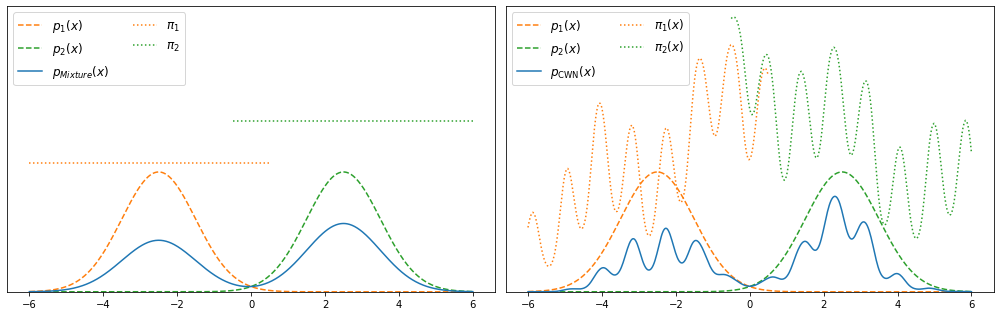

In [8]:

gauss1 = torch.distributions.MultivariateNormal(torch.tensor([-2.5]), torch.eye(1))
tt1 = torch.linspace(-6, .5, 200)
gauss2 = torch.distributions.MultivariateNormal(torch.tensor([2.5]), torch.eye(1))
tt2 = torch.linspace(-.5,6, 200)

pi_1 = torch.tensor(0.43)
pi_2 = torch.tensor(0.57)
tt = torch.linspace(-6,6,500)

fig = plt.figure(figsize = (14,4.5))
ax = fig.add_subplot(122)
ax.set_ylim(0,0.95)
ax.tick_params(left=False,bottom=True,labelleft=False,labelbottom=True)
ax.plot(tt, torch.exp(gauss1.log_prob(tt.unsqueeze(-1))), color = 'C1', linestyle = '--',label = r'$p_1(x)$')
ax.plot(tt, torch.exp(gauss2.log_prob(tt.unsqueeze(-1))), color = 'C2', linestyle = '--', label = r'$p_2(x)$')
ax.plot(tt,pi_1_x(tt)*torch.exp(gauss1.log_prob(tt.unsqueeze(-1))) + pi_2_x(tt)*torch.exp(gauss2.log_prob(tt.unsqueeze(-1))), color = 'C0', label = r'$p_{\rm{CWN}}(x)$')
ax.plot(tt1, pi_1_x(tt1), color = 'C1', linestyle = 'dotted', label =  r'$\pi_1(x)$')
ax.plot(tt2, pi_2_x(tt2), color = 'C2', linestyle = 'dotted', label = r'$\pi_2(x)$')
plt.legend(fontsize = 12,ncol = 2,loc = 'upper left')

ax = fig.add_subplot(121)
ax.set_ylim(0,0.95)
ax.tick_params(left=False,bottom=True,labelleft=False,labelbottom=True)
ax.plot(tt, torch.exp(gauss1.log_prob(tt.unsqueeze(-1))), color = 'C1', linestyle = '--',label = r'$p_1(x)$')
ax.plot(tt, torch.exp(gauss2.log_prob(tt.unsqueeze(-1))), color = 'C2', linestyle = '--', label = r'$p_2(x)$')
ax.plot(tt,pi_1*torch.exp(gauss1.log_prob(tt.unsqueeze(-1))) +pi_2*torch.exp(gauss2.log_prob(tt.unsqueeze(-1))), color = 'C0', label = r'$p_{Mixture}(x)$')
ax.plot(tt1, pi_1.repeat(tt1.shape), color = 'C1', linestyle = 'dotted', label =  r'$\pi_1$')
ax.plot(tt2, pi_2.repeat(tt2.shape), color = 'C2', linestyle = 'dotted', label = r'$\pi_2$')
plt.legend(fontsize = 12,ncol = 2,loc = 'upper left')
fig.tight_layout()
plt.show()